# Анализ сервиса аренды самокатов GoFast

**Краткое описание**

**Цели и задачи.** У нас в распоряжении находятся данные (`users_go.csv`, `rides_go.csv`, `subscriptions_go.csv`) сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. Мы проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

*БЕЗ ПОДПИСКИ*
 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - стоимость старта (начала поездки) — 50 рублей;

*С ПОДПИСКОЙ Ultra*
 - абонентская плата — 199 рублей в месяц;
 - стоимость одной минуты поездки — 6 рублей;
 - стоимость старта — бесплатно.

*ДАННЫЕ*
 - `users_go.csv` - содержит  информацию о пользователях, их поездках и подписках
 - `rides_go.csv` - содержит детальную информацию о поездках
 - `subscriptions_go.csv` - содержит детальную информацию по типам подписок

**План работы.** Данный анализ будет проведен поэтапно. Основные шаги:
 1. Загрузка данных и изучение общей информации
 2. Предобработка данных
 3. Исследовательский анализ данных
 4. Объединение данных
 5. Подсчёт выручки
 6. Проверка гипотез

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузка-данных" data-toc-modified-id="Шаг-1.-Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Внесем-изменения-в-датафрейм-rides" data-toc-modified-id="Внесем-изменения-в-датафрейм-rides-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Внесем изменения в датафрейм <code>rides</code></a></span></li><li><span><a href="#Проверим-наличие-пропущенных-значений-в-датафреймах" data-toc-modified-id="Проверим-наличие-пропущенных-значений-в-датафреймах-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверим наличие пропущенных значений в датафреймах</a></span></li><li><span><a href="#Проверим-наличие-явных-дубликатов-в-датафреймах-и-удалим-их,-в-случае-выявления" data-toc-modified-id="Проверим-наличие-явных-дубликатов-в-датафреймах-и-удалим-их,-в-случае-выявления-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверим наличие явных дубликатов в датафреймах и удалим их, в случае выявления</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Шаг-3.-Исследовательский-анализ-данных" data-toc-modified-id="Шаг-3.-Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Рассмотрим-частоту-встречаемости-городов" data-toc-modified-id="Рассмотрим-частоту-встречаемости-городов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Рассмотрим частоту встречаемости городов</a></span></li><li><span><a href="#Рассмотрим-соотношение-пользователей-с-подпиской-и-без-подписки" data-toc-modified-id="Рассмотрим-соотношение-пользователей-с-подпиской-и-без-подписки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Рассмотрим соотношение пользователей с подпиской и без подписки</a></span></li><li><span><a href="#Рассмотрим-расстояния,-которые-пользователи-преодолевают-за-одну-поездку" data-toc-modified-id="Рассмотрим-расстояния,-которые-пользователи-преодолевают-за-одну-поездку-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Рассмотрим расстояния, которые пользователи преодолевают за одну поездку</a></span></li><li><span><a href="#Рассмотрим-продолжительности-поездок" data-toc-modified-id="Рассмотрим-продолжительности-поездок-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Рассмотрим продолжительности поездок</a></span></li><li><span><a href="#Вывод.-По-полученным-данным-можно-сделать-следующий-общий-вывод-о-пользователях-сервиса:" data-toc-modified-id="Вывод.-По-полученным-данным-можно-сделать-следующий-общий-вывод-о-пользователях-сервиса:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод. По полученным данным можно сделать следующий общий вывод о пользователях сервиса:</a></span></li></ul></li><li><span><a href="#Шаг-4.-Объединение-данных" data-toc-modified-id="Шаг-4.-Объединение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Объединение данных</a></span><ul class="toc-item"><li><span><a href="#Объединяем-данные-о-пользователях,-поездках-и-подписках-в-один-датафрейм" data-toc-modified-id="Объединяем-данные-о-пользователях,-поездках-и-подписках-в-один-датафрейм-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Объединяем данные о пользователях, поездках и подписках в один датафрейм</a></span></li><li><span><a href="#Создаем-ещё-два-датафрейма-из-датафрейма,-созданного-на-этапе-4.1" data-toc-modified-id="Создаем-ещё-два-датафрейма-из-датафрейма,-созданного-на-этапе-4.1-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Создаем ещё два датафрейма из датафрейма, созданного на этапе 4.1</a></span></li><li><span><a href="#Визуализируем-информацию-о-расстоянии-и-времени-поездок-для-пользователей-категорий-free-и-ultra" data-toc-modified-id="Визуализируем-информацию-о-расстоянии-и-времени-поездок-для-пользователей-категорий-free-и-ultra-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Визуализируем информацию о расстоянии и времени поездок для пользователей категорий free и ultra</a></span></li></ul></li><li><span><a href="#Шаг-5.-Подсчёт-выручки" data-toc-modified-id="Шаг-5.-Подсчёт-выручки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Подсчёт выручки</a></span><ul class="toc-item"><li><span><a href="#Создаем-общий-датафрейм-с-агрегированными-данными-о-поездках." data-toc-modified-id="Создаем-общий-датафрейм-с-агрегированными-данными-о-поездках.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Создаем общий датафрейм с агрегированными данными о поездках.</a></span></li><li><span><a href="#Определяем-помесячную-выручку-от-каждого-пользователя" data-toc-modified-id="Определяем-помесячную-выручку-от-каждого-пользователя-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Определяем помесячную выручку от каждого пользователя</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Шаг-6.-Проверка-гипотез" data-toc-modified-id="Шаг-6.-Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Шаг 6. Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-№1" data-toc-modified-id="Гипотеза-№1-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Гипотеза №1</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Гипотеза-№2" data-toc-modified-id="Гипотеза-№2-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Гипотеза №2</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Гипотезу-№3" data-toc-modified-id="Гипотезу-№3-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Гипотезу №3</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Ответим-на-вопрос" data-toc-modified-id="Ответим-на-вопрос-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Ответим на вопрос</a></span><ul class="toc-item"><li><span><a href="#Ответ:" data-toc-modified-id="Ответ:-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Ответ:</a></span></li></ul></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('c:/users/user/Desktop/datasets/users_go.csv')
rides = pd.read_csv('c:/users/user/Desktop/datasets/rides_go.csv')
subscriptions = pd.read_csv('c:/users/user/Desktop/datasets/subscriptions_go.csv')
users.info()
users.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
rides.info()
rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [4]:
subscriptions.info()
subscriptions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


##### Вывод

Мы загрузили и получили данные из 3-х источников:
1. `users_go.csv` - данные о пользователях. Содержит столбцы `user_id`(идентификационный номер пользователя), `name`(имя пользователя), `age`(возраст), `city`(город), `subscription_type`(тип подписки). Данный датафрейм мы обозначили как `users`.
2. `rides_go.csv` - данные о поездках. Содержит столбцы `user_id`, `distance` (расстояние, которое пользователь проехал в текущей сессии в метрах), `duration` (продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»), `date`(дата совершения поездки). Данный датафрейм мы обозначили как `rides`
3. subscriptions_go.csv - данные о подписках. Содержит столбцы `subscription_type` (тип подписки), `minute_price` (стоимость одной минуты поездки по данной подписке), `start_ride_price` (стоимость начала поездки), `subscription_fee` (стоимость ежемесячного платежа). Данный датафрейм мы обозначили как `subscriptions`.

Общая информация изучена. Перейдем к предобработке данных.

#### Шаг 2. Предобработка данных

##### Внесем изменения в датафрейм `rides` 
 - приведем столбец с `date` к типу даты Pandas  
 - добавим столбец с номером месяца на основе столбца `date` 
 - округлим значения в столбцах `duartion` и `distance`

In [5]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides['month'] = pd.DatetimeIndex(rides['date']).month
rides['duration'] = np.round(rides['duration'],0)
rides['distance'] = np.round(rides['distance'], 0)

rides.info()
rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


,user_id,distance,duration,date,month
0,1,4410.0,26.0,2021-01-01,1
1,1,2618.0,16.0,2021-01-18,1
2,1,754.0,6.0,2021-04-20,4
3,1,2695.0,19.0,2021-08-11,8
4,1,4029.0,26.0,2021-08-28,8


##### Проверим наличие пропущенных значений в датафреймах

In [6]:
users.isna().sum()
rides.isna().sum()
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропущенных значений не обнаружено

##### Проверим наличие явных дубликатов в датафреймах и удалим их, в случае выявления

In [7]:
users.duplicated().sum()

31

In [8]:
rides.duplicated().sum()

0

In [9]:
subscriptions.duplicated().sum()

0

In [10]:
users = users.drop_duplicates().reset_index()

In [11]:
users.duplicated().sum()

0

##### Вывод
В результате предообработки данных во всех 3-х датафреймах мы внесли **изменения в датафрейм `rides`**,  а именно:
1. столбец `date` привели в типу даты Pandas
2. добавили новый столбец `month`, где на основе данных из столбца `date` указан номер месяца 
3. значения в столбцах `duration` и `distance` округлили в сторону ближайших целых значений (0 значений после запятой)

Далее мы проверили количество пропущенных значений во всех 3-х датафреймах. **Пропущенных значений не выявлено.**

Проверили датафреймы на наличие явных дубликатов. **Дубликаты (31)** были выявлены только в **датафреме `users`**. Выявленные **явные дубликаты были удалены, индексация датафрейма обновлена.**

In [12]:
# Код ревьюера
users.duplicated().sum()

0

#### Шаг 3. Исследовательский анализ данных
Опишем и визуализируем общую информацию о пользователях и поездках

##### Рассмотрим частоту встречаемости городов

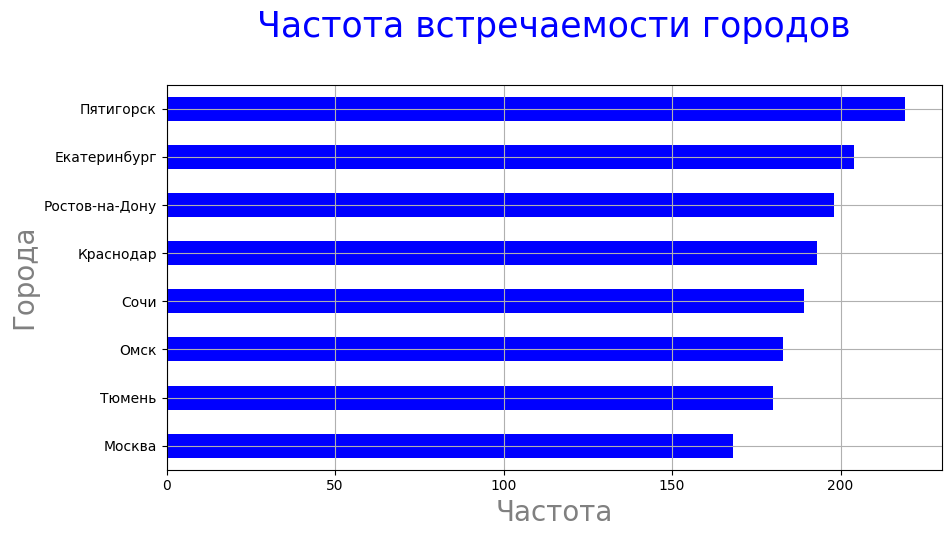

In [13]:
users.groupby('city')['user_id'].count().sort_values().plot(kind='barh', figsize=(10, 5), color='blue', grid=True)
plt.xlabel('Частота', fontsize = 20, color = 'grey')
plt.ylabel('Города', fontsize = 20, color = 'grey')
plt.title('Частота встречаемости городов' + "\n", fontsize = 25, color = 'blue')
plt.show()

По гистограмме мы видим, что Сервис работает в 8 городах России, включая Москву. Самое большое количество пользователей в г. Пятигорске (220), самое меньшее - в Москве(170). 

##### Рассмотрим соотношение пользователей с подпиской и без подписки

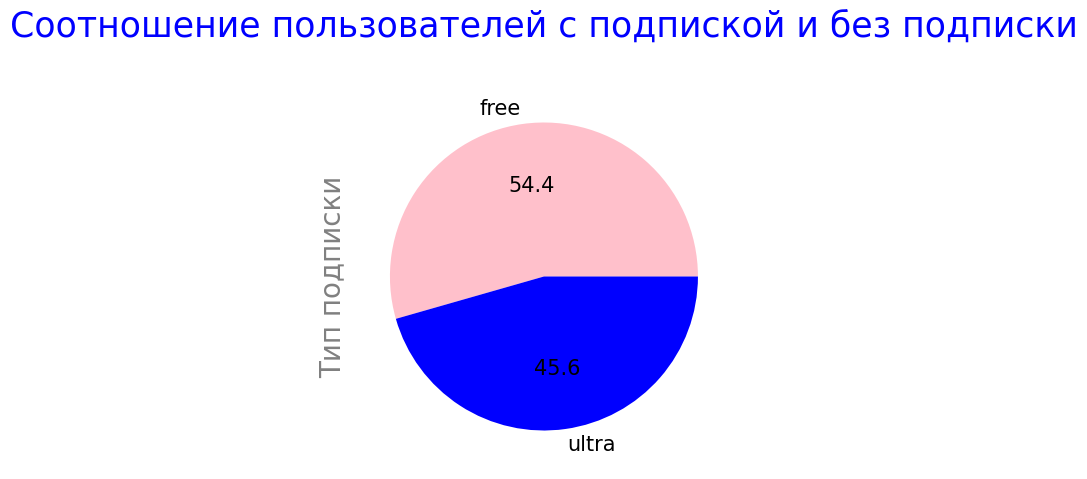

In [14]:
users['subscription_type'].value_counts().plot(kind = 'pie', figsize = (20, 5), colors=['pink', 'blue'],
                                               autopct='%.1f', fontsize=15)
plt.ylabel('Тип подписки', fontsize = 20, color = 'grey')
plt.title('Соотношение пользователей с подпиской и без подписки' + "\n", fontsize=25, color='blue')

plt.show()

Круговая диаграмма показывает, что большая часть пользователей предпочитает пользоваться тарифом Free (без подписки) - 54.4% от общего числа пользователей.

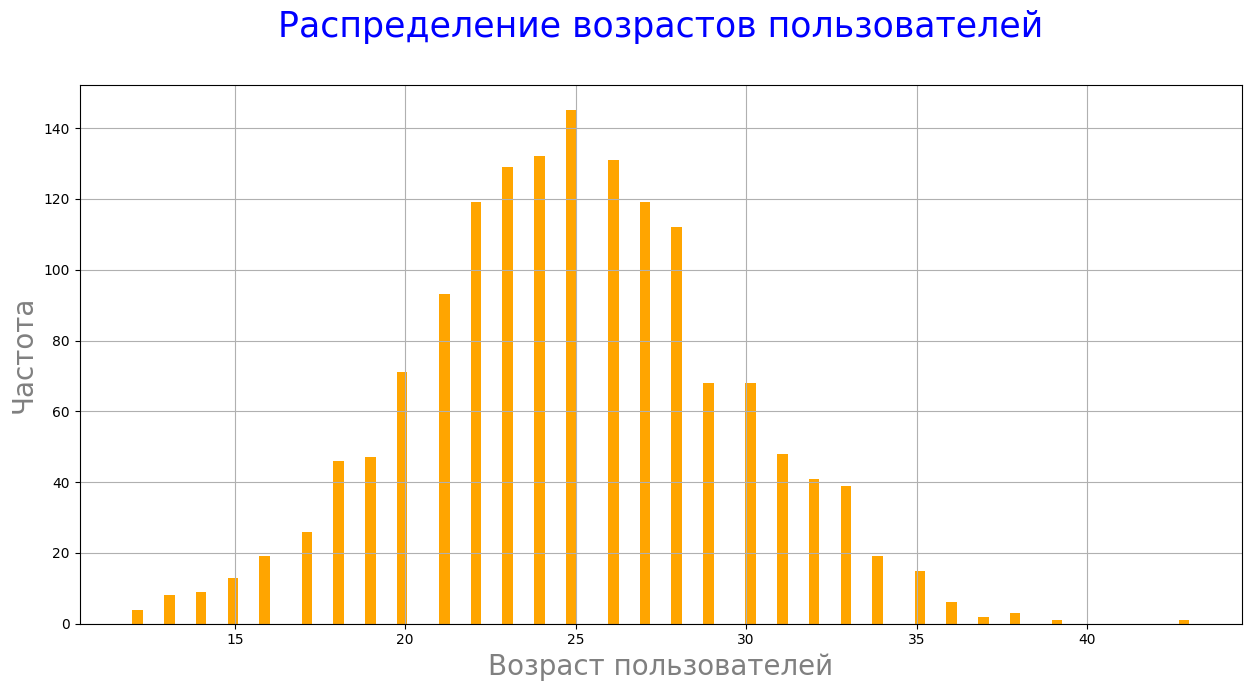

In [15]:
users['age'].plot(kind='hist', bins=100, figsize=(15, 7), color='orange', grid=True)

plt.ylabel('Частота', fontsize = 20, color = 'grey')
plt.xlabel('Возраст пользователей', fontsize = 20, color = 'grey')
plt.title('Распределение возрастов пользователей' + "\n", fontsize = 25, color='blue')
plt.show()

In [16]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [17]:
users['age'].median()

25.0

Согласно гистограмме распределения всех возрастов пользователей, возраст пользователей сервиса - от 12 до 43 лет. Средний возраст (который является также медианой) - 25 лет. Чаще всего сервисом пользуются именно 25 летние. Самыми активными пользователями можно назвать группу пользователей в возрасте от 20 до 30 лет. 

##### Рассмотрим расстояния, которые пользователи преодолевают за одну поездку

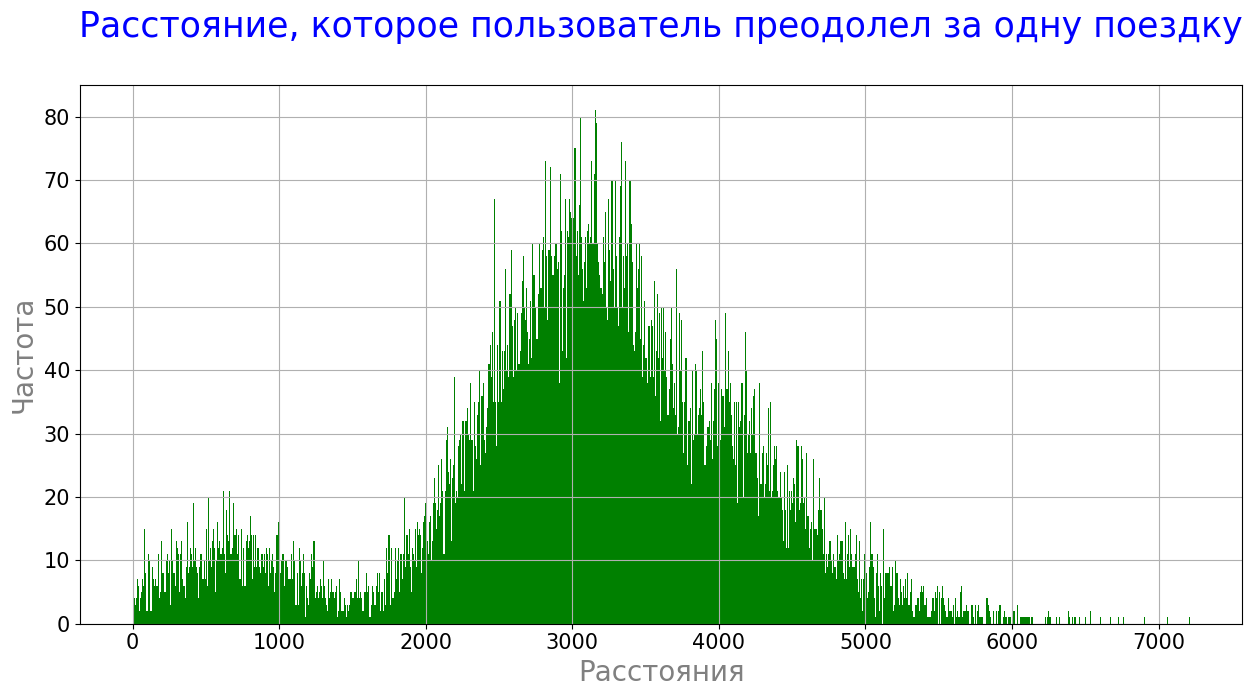

count    18068.000000
mean      3070.659010
std       1116.832209
min          1.000000
25%       2543.000000
50%       3134.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64

In [18]:
rides['distance'].plot(kind='hist', grid=True, figsize=(15,7), bins=1000,
                                                        fontsize=15, color='green')
plt.ylabel('Частота', fontsize = 20, color = 'grey')
plt.xlabel('Расстояния', fontsize = 20, color = 'grey')
plt.title('Расстояние, которое пользователь преодолел за одну поездку' + "\n", fontsize = 25, color='blue')
plt.show()

rides['distance'].describe()

По гистограмме и полученным мы видим, что **Среднее значение расстояния - 3070 метров**. Гистограмма распределния расстояний похожа на нормальное распределение. Большее количество "расстояний" лежат в диапазоне **от 2100 до 4600 метров.** Небольшие выборсы замечаются в диапазоне от 0 до 1000 метров. В данном диапазоне наблюдается некая активность позльзователей, превышающая данные в диапазоне от 1000 до 2000 метров.

##### Рассмотрим продолжительности поездок

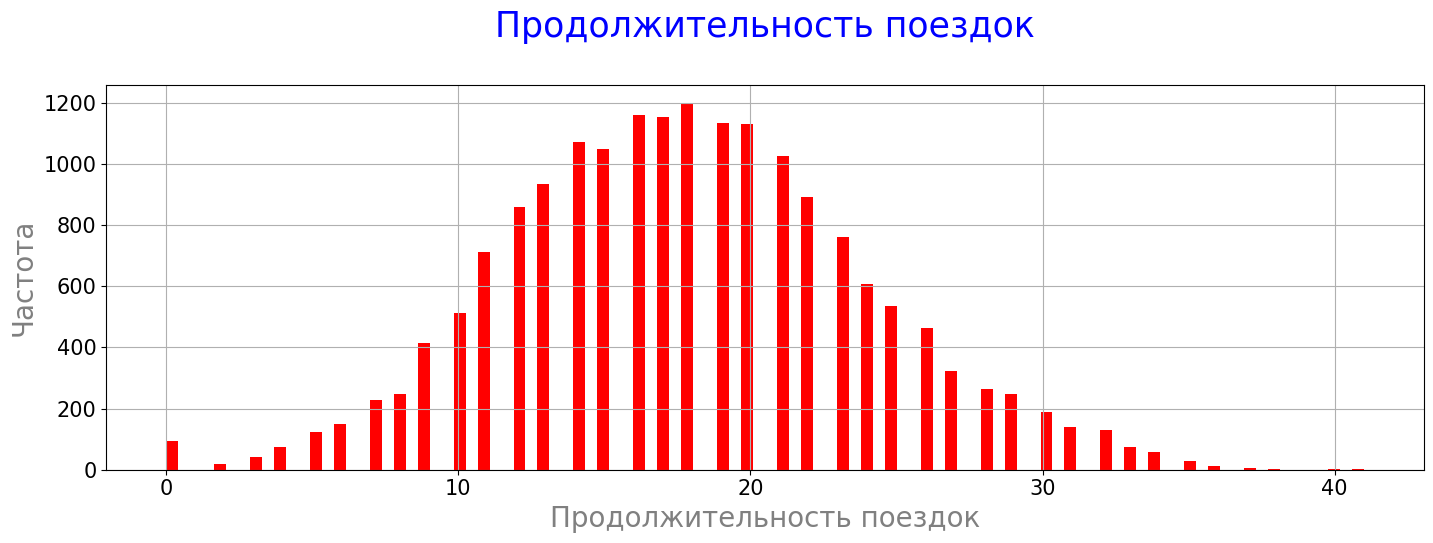

count    18068.000000
mean        17.803852
std          6.104153
min          0.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

In [19]:
rides['duration'].plot(kind='hist', grid=True, figsize=(17,5), bins=100, fontsize=15, color='red')
plt.ylabel('Частота', fontsize = 20, color = 'grey')
plt.xlabel('Продолжительность поездок', fontsize = 20, color = 'grey')
plt.title('Продолжительность поездок' + "\n", fontsize = 25, color='blue')
plt.show()

rides['duration'].describe()

По гистограмме распределения продолжительности 1 поездки мы видим среднее значение и оно же, самое частое значение продолжительности поездки - 18 мин. Большее количество значений продолжительности 1 поездки лежат в интервале от 10 до 26 минут.

##### Вывод. По полученным данным можно сделать следующий общий вывод о пользователях сервиса:
1. Сервис работает в 8 городах России, включая Москву. Самое большое количество пользователей в г. Пятигорске (220), самое меньшее в Москве(170).
2. Большая часть пользователей предпочитает пользоваться тарифом Free (без подписки) - 54.4% от общего числа пользователей.
3. Возраст пользователей сервиса - от 12 до 43 лет. Средний возраст (который является также медианой) - 25 лет. Чаще всего сервисом пользуются именно 25 летние. Самыми активными пользователями можно назвать группу пользователей в возрасте от 20 до 30 лет. 
4. **Среднее значение расстояния, которое пользователь преодолел за одну поездку, - 3070 метров**. Гистограмма распределния расстояний похожа на нормальное распределение. Большее количество "расстояний" лежат в диапазоне **от 2100 до 4600 метров.** Небольшие выборсы замечаются в диапазоне от 0 до 1000 метров. В данном диапазоне наблюдается некая активность позльзователей, превышающая данные в диапазоне от 1000 до 2000 метров.
5. По гистограмме распределения продолжительности 1 поездки мы видим среднее значение и оно же, самое частое значение продолжительности поездки - 18 мин. Большее количество значений продолжительности 1 поездки лежат в интервале от 10 до 26 минут.
6. **Среднее расстояние**, которое преодалевает пользователь за одну поездку - **порядка 3км.**, **средняя продолжительность 1 поездки - 18мин.**

#### Шаг 4. Объединение данных

##### Объединяем данные о пользователях, поездках и подписках в один датафрейм

In [20]:
general_data = users.merge(rides, on='user_id', how='outer')
display(general_data)

,index,user_id,name,age,city,subscription_type,distance,duration,date,month
0,0,1,Кира,22,Тюмень,ultra,4410.0,26.0,2021-01-01,1
1,0,1,Кира,22,Тюмень,ultra,2618.0,16.0,2021-01-18,1
2,0,1,Кира,22,Тюмень,ultra,754.0,6.0,2021-04-20,4
3,0,1,Кира,22,Тюмень,ultra,2695.0,19.0,2021-08-11,8
4,0,1,Кира,22,Тюмень,ultra,4029.0,26.0,2021-08-28,8
...,...,...,...,...,...,...,...,...,...,...
18063,1533,1534,Альберт,25,Краснодар,free,3781.0,20.0,2021-11-04,11
18064,1533,1534,Альберт,25,Краснодар,free,2840.0,21.0,2021-11-16,11
18065,1533,1534,Альберт,25,Краснодар,free,3826.0,18.0,2021-11-18,11
18066,1533,1534,Альберт,25,Краснодар,free,2902.0,17.0,2021-11-27,11


In [21]:
general_data = general_data.merge(subscriptions, on='subscription_type', how='left')
general_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              18068 non-null  int64         
 1   user_id            18068 non-null  int64         
 2   name               18068 non-null  object        
 3   age                18068 non-null  int64         
 4   city               18068 non-null  object        
 5   subscription_type  18068 non-null  object        
 6   distance           18068 non-null  float64       
 7   duration           18068 non-null  float64       
 8   date               18068 non-null  datetime64[ns]
 9   month              18068 non-null  int64         
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory 

In [22]:
general_data.head()

,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,0,1,Кира,22,Тюмень,ultra,4410.0,26.0,2021-01-01,1,6,0,199
1,0,1,Кира,22,Тюмень,ultra,2618.0,16.0,2021-01-18,1,6,0,199
2,0,1,Кира,22,Тюмень,ultra,754.0,6.0,2021-04-20,4,6,0,199
3,0,1,Кира,22,Тюмень,ultra,2695.0,19.0,2021-08-11,8,6,0,199
4,0,1,Кира,22,Тюмень,ultra,4029.0,26.0,2021-08-28,8,6,0,199


##### Создаем ещё два датафрейма из датафрейма, созданного на этапе 4.1

In [23]:
general_free = general_data.loc[general_data['subscription_type'] == 'free']
general_ultra = general_data.loc[general_data['subscription_type'] == 'ultra']

display(general_free.head())
display(general_ultra.head())

,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,699,700,Айдар,22,Омск,free,2516.0,15.0,2021-01-02,1,8,50,0
6501,699,700,Айдар,22,Омск,free,847.0,16.0,2021-02-01,2,8,50,0
6502,699,700,Айдар,22,Омск,free,4004.0,20.0,2021-02-04,2,8,50,0
6503,699,700,Айдар,22,Омск,free,1206.0,10.0,2021-02-10,2,8,50,0
6504,699,700,Айдар,22,Омск,free,3047.0,17.0,2021-02-14,2,8,50,0


,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,0,1,Кира,22,Тюмень,ultra,4410.0,26.0,2021-01-01,1,6,0,199
1,0,1,Кира,22,Тюмень,ultra,2618.0,16.0,2021-01-18,1,6,0,199
2,0,1,Кира,22,Тюмень,ultra,754.0,6.0,2021-04-20,4,6,0,199
3,0,1,Кира,22,Тюмень,ultra,2695.0,19.0,2021-08-11,8,6,0,199
4,0,1,Кира,22,Тюмень,ultra,4029.0,26.0,2021-08-28,8,6,0,199


##### Визуализируем информацию о расстоянии и времени поездок для пользователей категорий free и ultra

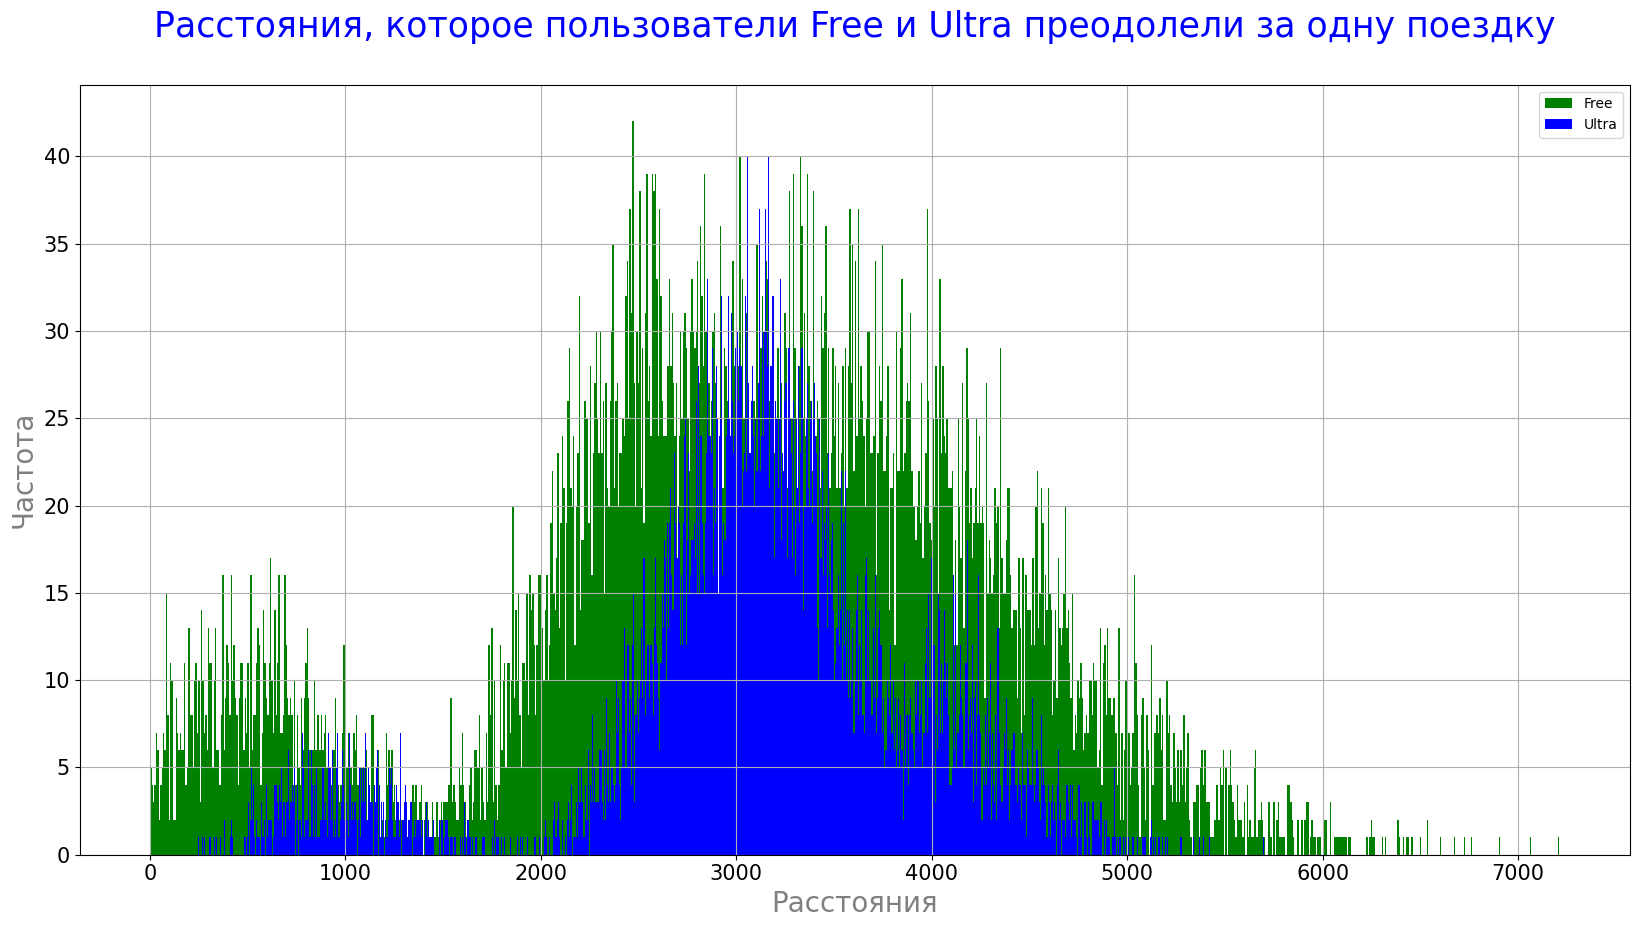

In [24]:
general_free['distance'].plot(kind='hist', bins=1000, grid=True, figsize=(20,10), fontsize=15, 
                              color='green', label='Free', legend=True)
general_ultra['distance'].plot(kind='hist', bins=1000, grid=True, figsize=(20,10), fontsize=15, 
                              color='blue', label='Ultra', legend=True)
plt.ylabel('Частота', fontsize = 20, color = 'grey')
plt.xlabel('Расстояния', fontsize = 20, color = 'grey')
plt.title('Расстояния, которое пользователи Free и Ultra преодолели за одну поездку' + "\n", fontsize = 25, color='blue')
plt.show()

In [25]:
general_free['distance'].describe()

count    11568.00000
mean      3045.49490
std       1246.17418
min          1.00000
25%       2367.00000
50%       3115.00000
75%       3906.00000
max       7211.00000
Name: distance, dtype: float64

In [26]:
general_ultra['distance'].describe()

count    6500.000000
mean     3115.443385
std       836.898137
min       244.000000
25%      2785.000000
50%      3149.000000
75%      3561.000000
max      5700.000000
Name: distance, dtype: float64

По полученным данным видно, что среднее расстояние, которое преодолевает пользователь с подпиской **Ultra (3115 метров), больше** того же показателя у пользователя с подпиской **Free (3045 метров)**. При этом у пользователей Ultra значения распределены в более узком диапазоне, что свидетельствует о меньшем стандартном отклоненнии значений от среднего. Это означаете, что большая часть значений у пользователей с подпиской **Ultra лежит в меньшем диапазоне: от 2500 до 3500 метров**, чем у пользователей с подпиской **Free: от 2000 до 4500 метров.** На данной гистограмме очевидна также разница в количестве пользователей с подписками Ultra и Free, что ранее было выявлено.

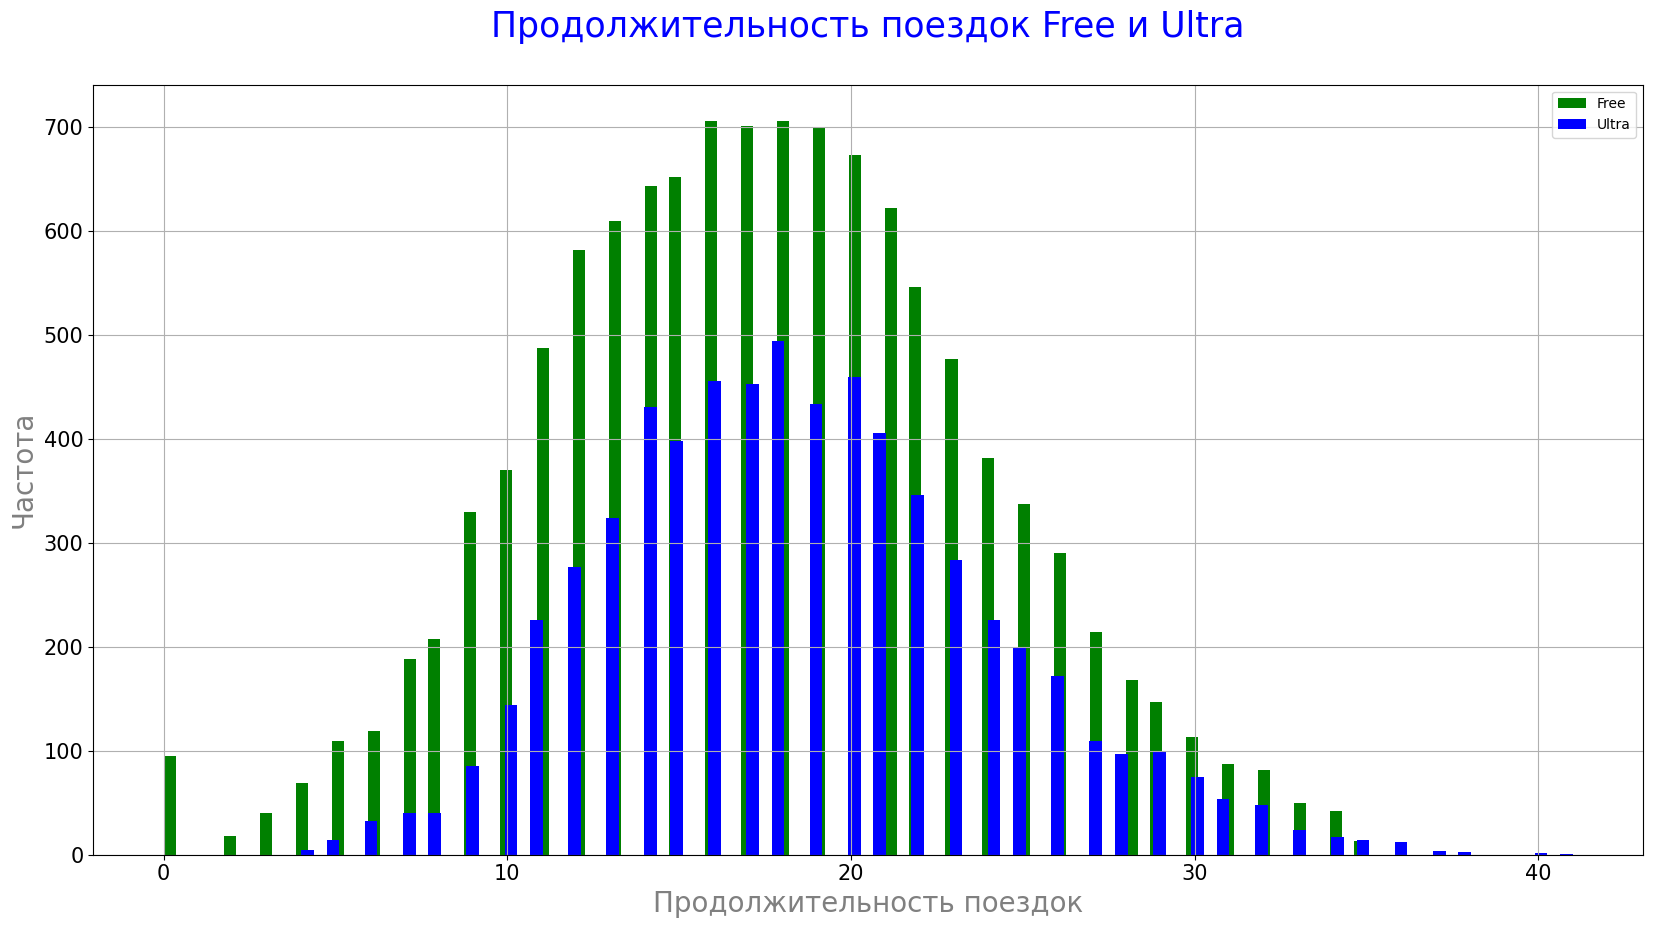

In [27]:
general_free['duration'].plot(kind='hist', bins=100, grid=True, figsize=(20,10), fontsize=15, 
                              color='green', label='Free', legend=True)
general_ultra['duration'].plot(kind='hist', bins=100, grid=True, figsize=(20,10), fontsize=15, 
                              color='blue', label='Ultra', legend=True)
plt.ylabel('Частота', fontsize = 20, color = 'grey')
plt.xlabel('Продолжительность поездок', fontsize = 20, color = 'grey')
plt.title('Продолжительность поездок Free и Ultra' + "\n", fontsize = 25, color='blue')
plt.show()

In [28]:
general_free['duration'].describe()

count    11568.000000
mean        17.385028
std          6.343957
min          0.000000
25%         13.000000
50%         17.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

In [29]:
general_ultra['duration'].describe()

count    6500.000000
mean       18.549231
std         5.575445
min         4.000000
25%        15.000000
50%        18.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

По полученным данным видно, что среднняя продолжительность 1-ой поездки у пользователей с подпиской **Ultra (18.5 мин.), чуть больше** того же показателя у пользователей с подпиской **Free (17.4 мин.)**. Как и с распределениями расстояний, в данном случае у пользователей Ultra значения также распределены в более узком диапазоне, что свидетельствует о меньшем стандартном отклонении значений от среднего. Это означает, что большая часть значений у пользователей с подпиской **Ultra лежит в меньшем диапазоне: от 11 до 25 мин.**, чем у пользователей с подпиской **Free: от 8 до 27 мин.** На данной гистограмме очевидна также разница в количестве пользователей с подписками Ultra и Free, что ранее было выявлено.

#### Шаг 5. Подсчёт выручки

##### Создаем общий датафрейм с агрегированными данными о поездках.
Находим суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [30]:
general_agr = general_data.pivot_table(index = ['user_id', 'month', 'subscription_type'], 
    values = ['distance', 'duration'], aggfunc = {'distance' : 'sum', 'duration' : ['sum', 'count']}).reset_index()
general_agr.columns = ['user_id', 'month', 'subscription_type', 'total_distance', 'trips', 'total_duration']
display(general_agr.head())

,user_id,month,subscription_type,total_distance,trips,total_duration
0,1,1,ultra,7028.0,2,42.0
1,1,4,ultra,754.0,1,6.0
2,1,8,ultra,6724.0,2,45.0
3,1,10,ultra,5810.0,2,32.0
4,1,11,ultra,7004.0,3,53.0


In [31]:
general_agr['total_duration'] = general_agr['total_duration'].round()

general_agr.info()

general_agr.reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   month              11331 non-null  int64  
 2   subscription_type  11331 non-null  object 
 3   total_distance     11331 non-null  float64
 4   trips              11331 non-null  int64  
 5   total_duration     11331 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 531.3+ KB


,index,user_id,month,subscription_type,total_distance,trips,total_duration
0,0,1,1,ultra,7028.0,2,42.0
1,1,1,4,ultra,754.0,1,6.0
2,2,1,8,ultra,6724.0,2,45.0
3,3,1,10,ultra,5810.0,2,32.0
4,4,1,11,ultra,7004.0,3,53.0
...,...,...,...,...,...,...,...
11326,11326,1534,6,free,3409.0,2,24.0
11327,11327,1534,8,free,7623.0,2,47.0
11328,11328,1534,9,free,4928.0,1,23.0
11329,11329,1534,11,free,13349.0,4,76.0


##### Определяем помесячную выручку от каждого пользователя
В этот же датафрейм добавляем столбец с помесячной выручкой, которую принёс каждый пользователь

In [32]:
def revenue(row):
        if row['subscription_type'] == 'ultra':
            return row['total_duration']*6 + 199
        elif row['subscription_type'] == 'free':
            return row['total_duration']*8 + row['trips']*50
        
general_agr['revenue'] = general_agr.apply(revenue, axis=1)

display(general_agr.head())

,user_id,month,subscription_type,total_distance,trips,total_duration,revenue
0,1,1,ultra,7028.0,2,42.0,451.0
1,1,4,ultra,754.0,1,6.0,235.0
2,1,8,ultra,6724.0,2,45.0,469.0
3,1,10,ultra,5810.0,2,32.0,391.0
4,1,11,ultra,7004.0,3,53.0,517.0


##### Вывод
В результате мы получили необходимый датафрейм для расчета выручки. Данные для этого датафреймы агрегированы из предыдущих датафреймов и содержат информацию о суммарном расстоянии, количестве поездок, суммарном времени и выручке относительно каждого пользователя за каждый месяц.

#### Шаг 6. Проверка гипотез

#####  Гипотеза №1
Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то действительно ли пользователи с подпиской «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки. Нулевая гипотеза: Пользователи с подпиской и без тратя одинаковое время на поездки. Альтернативная - пользователи с подпсикой тратят больше времени на поездки.

In [33]:
ultra_duration = general_ultra['duration']
free_duration = general_free['duration']

alpha = 0.05


results = st.ttest_ind(ultra_duration, free_duration, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута. Пользователи с подпиской тратят больше времени на поездки')
else:
    print('Нулевая гипотеза не отвергнута')

p-значение: 3.1600689435611813e-35
Нулевая гипотеза отвергнута. Пользователи с подпиской тратят больше времени на поездки


###### Вывод
Гипотеза "Пользователи с подпиской и без тратят одинаковое время на поездки" отвергнута. Альтернативная гипотеза "пользователи с подпсикой тратят больше времени на поездки" не отвергнута.

##### Гипотеза №2
Расстояние одной поездки в 3130 метров— оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу. Нулевая гипотеза - расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров. Алтернитивная гипотеза - расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3130 метров.

In [34]:
ultra_distance = general_ultra['distance']

estimated_distance = 3130
alpha = .05

results = st.ttest_1samp(ultra_distance, estimated_distance, alternative='less')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута. Расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3130 метров')
else:
    print('Нулевая гипотеза не отвергнута')

p-значение: 0.0804350105302276
Нулевая гипотеза не отвергнута


###### Вывод
Гипотеза о том, что расстоение, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров, не может быть отвергнута. 

##### Гипотеза №3
Гипотеза о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Нулевая гипотеза - помесячная выручка от пользователей с подпиской по месяцам равно выручке от пользователей без подписки. Алтернативная - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [35]:
ultra_revenue = general_agr[general_agr['subscription_type'] == 'ultra']['revenue']
free_revenue = general_agr[general_agr['subscription_type'] == 'free']['revenue']

alpha = 0.05


results = st.ttest_ind(ultra_revenue, free_revenue, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки')
else:
    print('Нулевая гипотеза не отвергнута')

p-значение: 1.7274069878387966e-37
Нулевая гипотеза отвергнута. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки


###### Вывод
Мы провели тест для нулевой гипотезы "помесячная выручка от пользователей с подпиской по месяцам равно выручке от пользователей без подписки": односторонний правый (альтернативная гипотеза - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки). В результате проведенных тестов можно не отвергать альтернитивную гипотезу "помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки".

##### Ответим на вопрос
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы

###### Ответ: 
для этого нам понадобится проверить гипотезу о равенстве средних двух генеральных совокупностей для зависимых (парных) выборок в Python. Применяемый метод - scipy.stats.ttest_rel().

#### Итоговый вывод

**Краткий обзор проведенной работы**

Мы провели анализ данных и проверили некоторые гипотезы для сервиса аренды самокатов GoFast.
Результаты анализа могут быть применены для выявления новых возможностей роста бизнеса.

В нашем распоряжении были данные из 3-х источников:
- users_go.csv - данные о пользователях. Содержит столбцы user_id(идентификационный номер пользователя), name(имя пользователя), age(возраст), city(город), subscription_type(тип подписки). Данный датафрейм мы обозначили как users.
- rides_go.csv - данные о поездках. Содержит столбцы user_id, distance (расстояние, которое пользователь проехал в текущей сессии в метрах), duration (продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»), date(дата совершения поездки). Данный датафрейм мы обозначили как rides
- subscriptions_go.csv - данные о подписках. Содержит столбцы subscription_type (тип подписки), minute_price (стоимость одной минуты поездки по данной подписке), start_ride_price (стоимость начала поездки), subscription_fee (стоимость ежемесячного платежа). Данный датафрейм мы обозначили как subscriptions.

В результате предообработки данных во всех 3-х датафреймах мы внесли **изменения в датафрейм `rides`**,  а именно:
1. столбец `date` привели в типу даты Pandas
2. добавили новый столбец `month`, где на основе данных из столбца `date` указан номер месяца 
3. значения в столбцах `duration` и `distance` округлили в сторону ближайших целых значений (0 значений после запятой)

Далее мы проверили количество пропущенных значений во всех 3-х датафреймах. **Пропущенных значений не выявлено.**

Проверили датафреймы на наличие явных дубликатов. **Дубликаты (31)** были выявлены только в **датафреме `users`**. Выявленные **явные дубликаты были удалены, индексация датафрейма обновлена.**

Провели **исследовательский анализ**. Описали и визуализировали следующие данные:
- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

Сделали **специальный датафрейм для расчета выручки**. Данные для этого датафреймы агрегированы из предыдущих датафреймов и содержат информацию о суммарном расстоянии, количестве поездок, суммарном времени и выручке относительно каждого пользователя за каждый месяц.

Проверили 3 гипотезы, которые позволят понимать, нужно ли стремиться увеличивать количество пользователей с подпиской. 


**Главные выводы**

Общие сведения о пользователях сервиса:
1. Сервис работает в 8 городах России, включая Москву. Самое большое количество пользователей в г. Пятигорске (220), самое меньшее в Москве(170).
2. Большая часть пользователей предпочитает пользоваться тарифом **Free (без подписки) - 54.4%** от общего числа пользователей.
3. **Возраст пользователей сервиса - от 12 до 43 лет**. **Средний возраст** (который является также медианой) - **25 лет.** Чаще всего сервисом пользуются именно 25 летние. **Самыми активными** пользователями можно назвать группу пользователей в возрасте **от 20 до 30 лет.** 
4. **Среднее расстояние**, которое преодалевает пользователь за одну поездку - **порядка 3км.**, **средняя продолжительность 1 поездки - 18мин.**
5. **Cреднее расстояние**, которое преодолевает пользователь с подпиской **Ultra (3115 метров), больше** того же показателя у пользователя с подпиской **Free (3045 метров)**.  Большая часть значений у пользователей с подпиской Ultra лежит в меньшем диапазоне: от 2500 до 3500 метров, чем у пользователей с подпиской Free: от 2000 до 4500 метров. 
6. **Среднняя продолжительность** 1-ой поездки у пользователей с подпиской **Ultra (18.5 мин.), чуть больше** того же показателя у пользователей с подпиской **Free (17.4 мин.).** Большая часть значений у пользователей с подпиской Ultra лежит в меньшем диапазоне: от 11 до 25 мин., чем у пользователей с подпиской Free: от 8 до 27 мин. 

Мы провели проверку 3-х гипотез, в результате которых пришли к выводу, что **не отвергаем** следующие 3 гипотезы:
1. Пользователи с подпиской тратят больше времени на поездки
2. Расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров
3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки


**Рекомендации**

Рекомендуем провести дополнительный анализ показателей выручки у пользователей с подпиской и без подписки, проанализированность сезонность спроса на сервис по месяцам у пользвателей с подпиской и без, проанализировать количество пользователей с подпиской и без по городам и по возрасту пользователей. В случае проведения дополнительных акций по привлечению новых пользователй с подпиской, рекомендуем провести анализ затрат на акции и  планируемой выручки от прогнозируемого количества пользователей с подпиской. 
Рекомендуем продакт-менеджерам рассмотреть возможность дополнительных видов подписок.